# 보험료 예측

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [279]:
df = pd.read_csv("./data1/premium.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [280]:
le = LabelEncoder()

df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [281]:
df = df.dropna(axis=1)

age


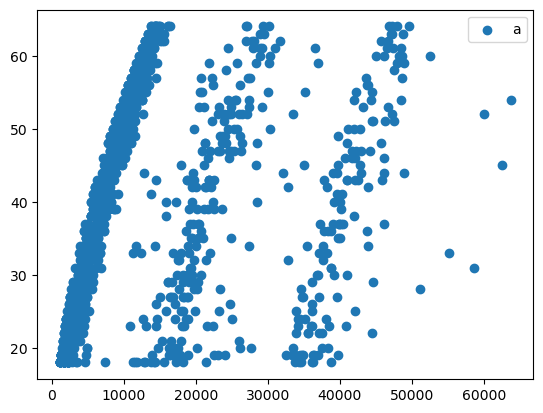

sex


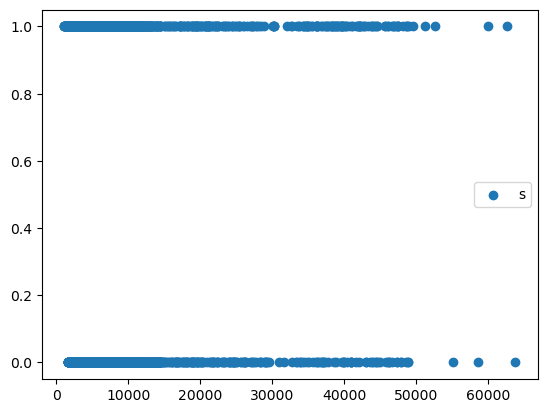

children


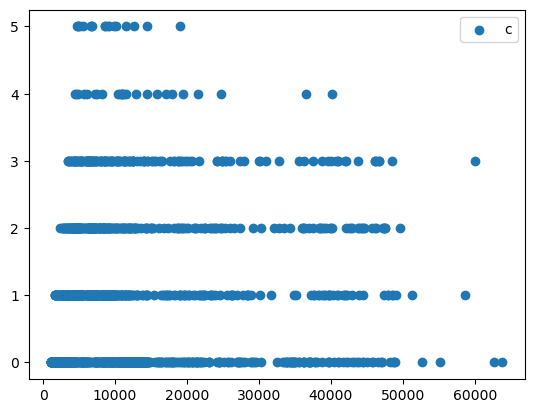

smoker


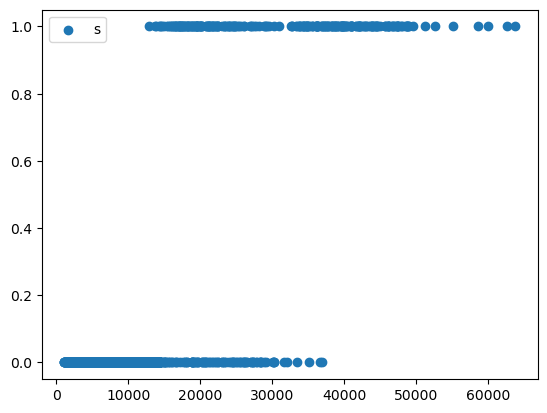

region


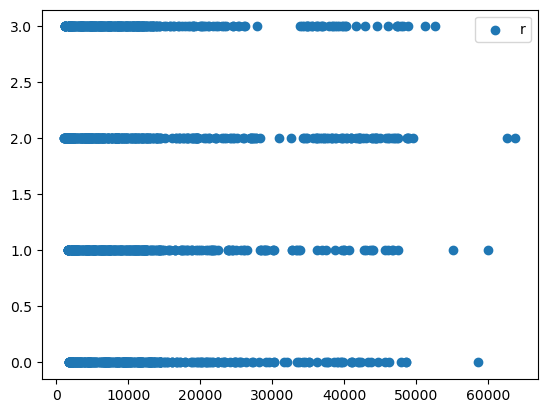

In [282]:

for i in df.drop("charges", axis=1).columns:
    print(i)
    plt.scatter(x= df["charges"], y=df[i])
    plt.legend(i)
    plt.show()

In [283]:
# 선형회귀 예측 시각화 함수

def plt_prediction(pred, y, x):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, color='blue', label='Actual')
    plt.scatter(x, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [284]:
X = df.drop("charges", axis=1).values
y = df["charges"].values

-----------
# LinearRegression

In [285]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred[:5]

array([10322.63218482,  7068.90815155, 38398.60926134, 11085.59356008,
       26135.04436036])

In [286]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(6132.28582593517), np.float64(37604929.45096538))

In [287]:
lr_r2 = r2_score(y_test, y_pred)
lr_r2

np.float64(0.7577762530513299)

In [288]:
lr.intercept_, lr.coef_

(np.float64(-2812.5945958679313),
 array([  273.80718892,    57.75860052,   406.9516396 , 23663.09981997,
           24.44394622]))

In [289]:
nmse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
r2 = cross_val_score(lr, X, y, scoring='r2', cv=5)

In [290]:
print(f"neg_mean_squared_error: {nmse}, {np.mean(nmse) :.4f}")
print("")
print(f"r2: {r2}, {np.mean(r2) :.4f}")

neg_mean_squared_error: [-40739027.06429013 -40543550.86682069 -37895517.08909674
 -43925742.86938365 -40943299.78046484], -40809427.5340

r2: [0.73783998 0.68784856 0.74179707 0.70410276 0.73043934], 0.7204


--------------
# RandomForestRegressor

In [291]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [292]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse, rf_mse

(np.float64(6547.290554164156), np.float64(42867013.600647174))

In [293]:
rf_r2 = r2_score(y_test, y_pred)
rf_r2

np.float64(0.7238817142739833)

In [294]:
rf_nmse_cv = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=5)
rf_r2_cv = cross_val_score(rf, X, y, scoring='r2', cv=5)

In [295]:
print(f"neg_mean_squared_error: {np.mean(np.sqrt(rf_nmse_cv*-1)) :.4f}")
print("")
print(f"r2: {np.mean(rf_r2_cv) :.4f}")

neg_mean_squared_error: 7072.0393

r2: 0.6593


--------

# 종합

In [298]:
# cv 이전
print(f"LinearRegression neg_mean_squared_error: {np.mean(rmse):.4f},\n r2: {np.mean(lr_r2):.4f}\n\n")
print(f"RandomForest neg_mean_squared_error: {np.mean(rf_rmse):.4f},\n r2: {np.mean(rf_r2):.4f}")

LinearRegression neg_mean_squared_error: 6132.2858,
 r2: 0.7578


RandomForest neg_mean_squared_error: 6547.2906,
 r2: 0.7239


In [299]:
# cv 이후
print(f"LinearRegression neg_mean_squared_error: {np.mean(nmse*-1):.4f},\n r2: {np.mean(r2):.4f}\n\n")
print(f"RandomForest neg_mean_squared_error: {np.mean(rf_nmse_cv*-1):.4f},\n r2: {np.mean(rf_r2_cv) :.4f}")

LinearRegression neg_mean_squared_error: 40809427.5340,
 r2: 0.7204


RandomForest neg_mean_squared_error: 50025956.2738,
 r2: 0.6593


------------------
# 다항회귀

In [303]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [305]:
results = []

for degree in range(1, 10):
    model_poly = Pipeline(
        [
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('Linear', LinearRegression())
        ]
    )
    model_poly.fit(x_train, y_train)
    pred_poly = model_poly.predict(x_test)
    
    mse = mean_squared_error(y_test, pred_poly)
    rmse = np.sqrt(mse)

    r2 = r2_score(y_test, pred_poly)

    results.append(
        {
            'degree': degree,
            'MSE': mse,
            "RMSE": rmse,
            "r2": r2
        }
    )


pd.DataFrame(results)

,degree,MSE,RMSE,r2
0,1,3.760493e+07,6132.285826,0.757776
1,2,3.920927e+07,6261.730700,0.747442
2,3,3.958233e+07,6291.449179,0.745039
3,4,4.247765e+07,6517.487646,0.726390
4,5,4.749282e+07,6891.503818,0.694086
5,6,1.312114e+09,36223.115778,-7.451690
6,7,1.388180e+11,372582.908324,-893.165268
7,8,1.615650e+10,127108.216281,-103.068474
8,9,3.312667e+10,182007.328659,-212.378025
